In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


## Load The Data

In [26]:
data=pd.read_csv('Real-life-example.csv')

In [27]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [28]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [29]:
data_no_mv=data.dropna()
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [30]:
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


## Check Linearity

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

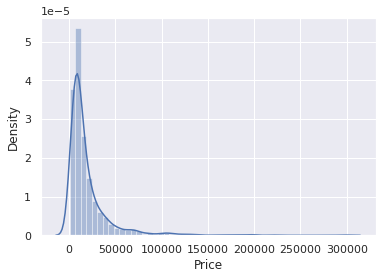

In [31]:
sns.distplot(data_no_mv['Price'])

### Handling Outliers

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

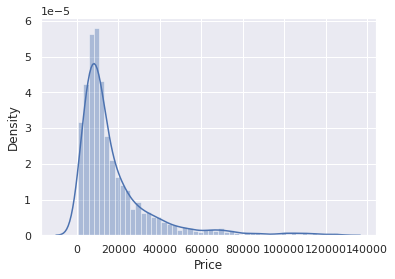

In [32]:
#taking the 99 percent of the data
q=data['Price'].quantile(0.99)
data=data[data['Price']<q]
sns.distplot(data['Price'])

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

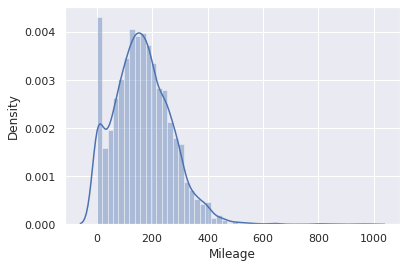

In [33]:
sns.distplot(data['Mileage'])

In [34]:
q=data_no_mv['Mileage'].quantile(0.99)

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

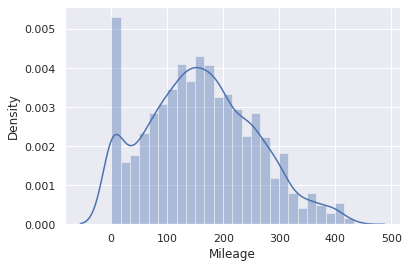

In [35]:
data_no_mv=data_no_mv[data_no_mv['Mileage']<q]
sns.distplot(data_no_mv['Mileage'])

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,303
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1516,NaN,NaN,1833,3616,NaN,185
mean,NaN,19668.596878,NaN,159.892570,2.768489,NaN,NaN,2006.479669,NaN
std,NaN,25893.860852,NaN,96.633975,4.960538,NaN,NaN,6.616733,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21962.250000,NaN,227.000000,3.000000,NaN,NaN,2012.000000,NaN


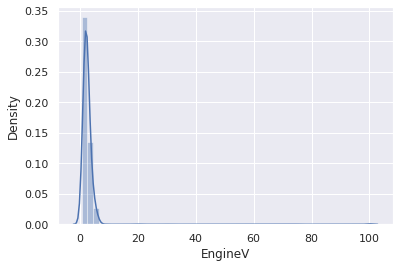

In [36]:
# data_no_mv.count()
sns.distplot(data_no_mv['EngineV'])
# data_no_mv['EngineV'].plot()
data_no_mv.describe(include='all')

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

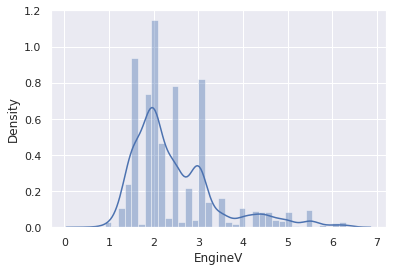

In [37]:
data_no_mv=data_no_mv[data_no_mv['EngineV']<6.5]
sns.distplot(data_no_mv['EngineV'])

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

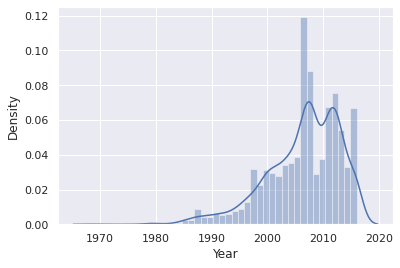

In [38]:
sns.distplot(data_no_mv['Year'])

In [39]:
q=data_no_mv['Year'].quantile(0.01)

/home/crash/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

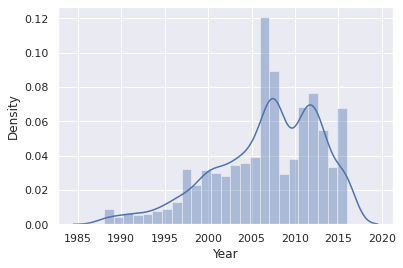

In [40]:
data_no_mv=data_no_mv[data_no_mv['Year']>q]
sns.distplot(data_no_mv['Year'])

In [41]:
data_clean=data_no_mv.reset_index(drop=True)
data_clean.head(100)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
95,BMW,3500.0,sedan,334,2.0,Diesel,no,1999,320
96,Audi,39000.0,sedan,18,1.8,Other,yes,2015,A5
97,Toyota,13500.0,crossover,150,4.7,Gas,yes,2002,Land Cruiser 100
98,Mitsubishi,6150.0,sedan,175,1.6,Petrol,yes,2007,Lancer


# Lets Check the OLS Options

Text(0.5, 1.0, 'Price and EngineV')

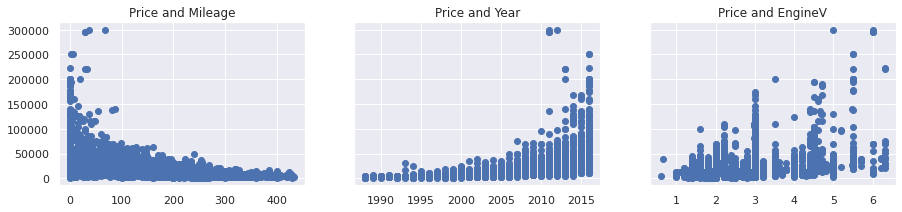

In [42]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3),sharey=True)
ax1.scatter(data_clean['Mileage'],data_clean['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_clean['Year'],data_clean['Price'])
ax2.set_title('Price and Year')
ax3.scatter(data_clean['EngineV'],data_clean['Price'])
ax3.set_title('Price and EngineV')

### The above plot indicates the values have an Exponential distribution
-> normal fix is to take a Log Transformation

In [43]:
data_clean['log_price']=np.log(data_clean['Price'])

Text(0.5, 1.0, 'log_price and EngineV')

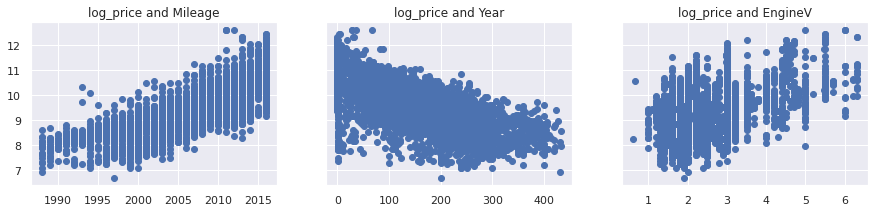

In [44]:
fig2,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3),sharey=True)
ax1.scatter(data_clean['Year'],data_clean['log_price'])
ax1.set_title('log_price and Mileage')
ax2.scatter(data_clean['Mileage'],data_clean['log_price'])
ax2.set_title('log_price and Year')
ax3.scatter(data_clean['EngineV'],data_clean['log_price'])
ax3.set_title('log_price and EngineV')


In [45]:
data_clean=data_clean.drop('Price',axis=1)

## Multicollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
var=data_clean[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(var,i) for i in range(var.shape[1])]
vif

,VIF
0,3.703266
1,7.400348
2,10.323287
